In [45]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd

In [46]:
data = pd.read_csv("Airline_data.csv")
data.head()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0


In [47]:
mean_values = data.iloc[:, 1:4].mean()
print(mean_values)

Fatal accidents                  23.8
Passenger deaths                691.9
Miles flown [100 mln miles]    5715.8
dtype: float64


In [48]:
std_values = data.iloc[:, 1:4].std()
print(std_values)

Fatal accidents                   4.709329
Passenger deaths                252.389228
Miles flown [100 mln miles]    1117.767795
dtype: float64


Performing prior predictive analysis

In [49]:
model_prior=CmdStanModel(stan_file='model1.stan')
R = 1000
sim=model_prior.sample(iter_sampling=R, iter_warmup=0, chains=1, fixed_param=True, seed=29042020, refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [50]:
df_prior = sim.draws_pd()
df_prior.head()

,lp__,accept_stat__,alpha,theta,n,lambda,y
0,0.0,0.0,1.287470,0.000916,4294.88,185.274,197.0
1,0.0,0.0,0.338474,0.000982,5311.37,258.172,257.0
2,0.0,0.0,1.207760,0.000933,6336.36,1232.190,1152.0
3,0.0,0.0,0.907809,0.000848,7181.56,1095.200,1120.0
4,0.0,0.0,0.738417,0.000824,7570.95,1067.950,1003.0


<Figure size 432x288 with 0 Axes>

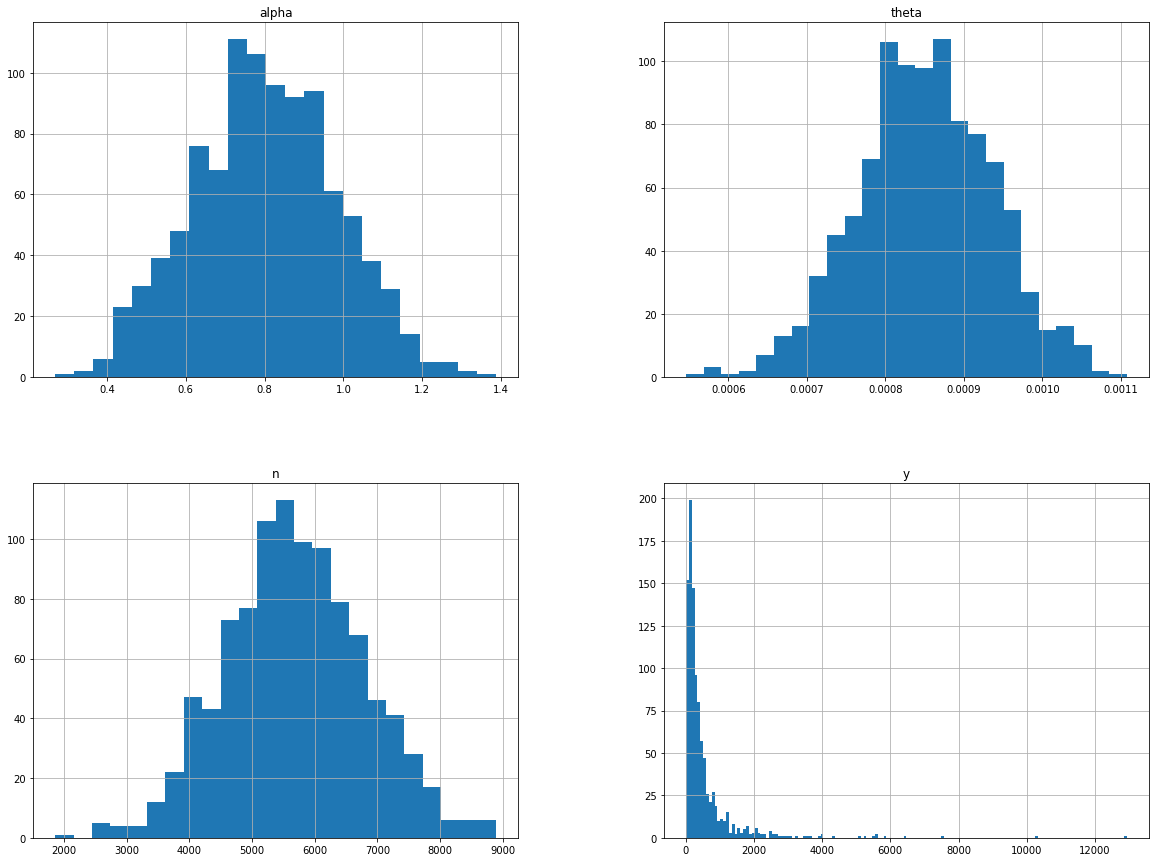

In [51]:
plt.figure()
df_hist = df_prior.loc[:, ["alpha", "theta", "n", "y"]]
df_hist.hist(layout=(2, 2), bins='auto',  figsize=(20, 15))
plt.show()

In [52]:
print(df_prior.loc[:, ["alpha", "theta", "n", "y"]].mean())

alpha       0.802203
theta       0.000851
n        5686.312800
y         529.959000
dtype: float64


In [53]:
print(df_prior.loc[:, ["alpha", "theta", "n", "y"]].std())

alpha       0.181404
theta       0.000086
n        1110.032041
y         904.808538
dtype: float64


Posterior predictive analysis

In [54]:
model_fit=CmdStanModel(stan_file='model2.stan')
N=data.shape[0]
data_fit = {'N': N, 'n': data["Miles flown [100 mln miles]"].values, 'y': data["Fatal accidents"].values}

fit=model_fit.sample(data=data_fit,seed=28052020)
df_fit = fit.draws_pd()
df_fit.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,471.943,1.000000,0.002933,2.0,7.0,0.0,-471.531,0.924607,0.000374,14.0,15.0,15.0,27.0,21.0,30.0,19.0,19.0,36.0,31.0
1,471.295,0.843177,0.002933,2.0,3.0,0.0,-470.653,0.924398,0.000360,15.0,9.0,16.0,12.0,31.0,23.0,20.0,21.0,43.0,28.0
2,471.349,0.996288,0.002933,8.0,351.0,0.0,-470.334,0.852411,0.000389,6.0,11.0,20.0,18.0,17.0,27.0,20.0,29.0,46.0,35.0
3,471.040,0.999896,0.002933,8.0,295.0,0.0,-470.689,0.810245,0.000388,6.0,8.0,11.0,22.0,30.0,22.0,22.0,17.0,38.0,30.0
4,472.287,0.999835,0.002933,9.0,631.0,0.0,-470.580,1.024380,0.000356,6.0,8.0,16.0,32.0,17.0,22.0,22.0,22.0,26.0,39.0


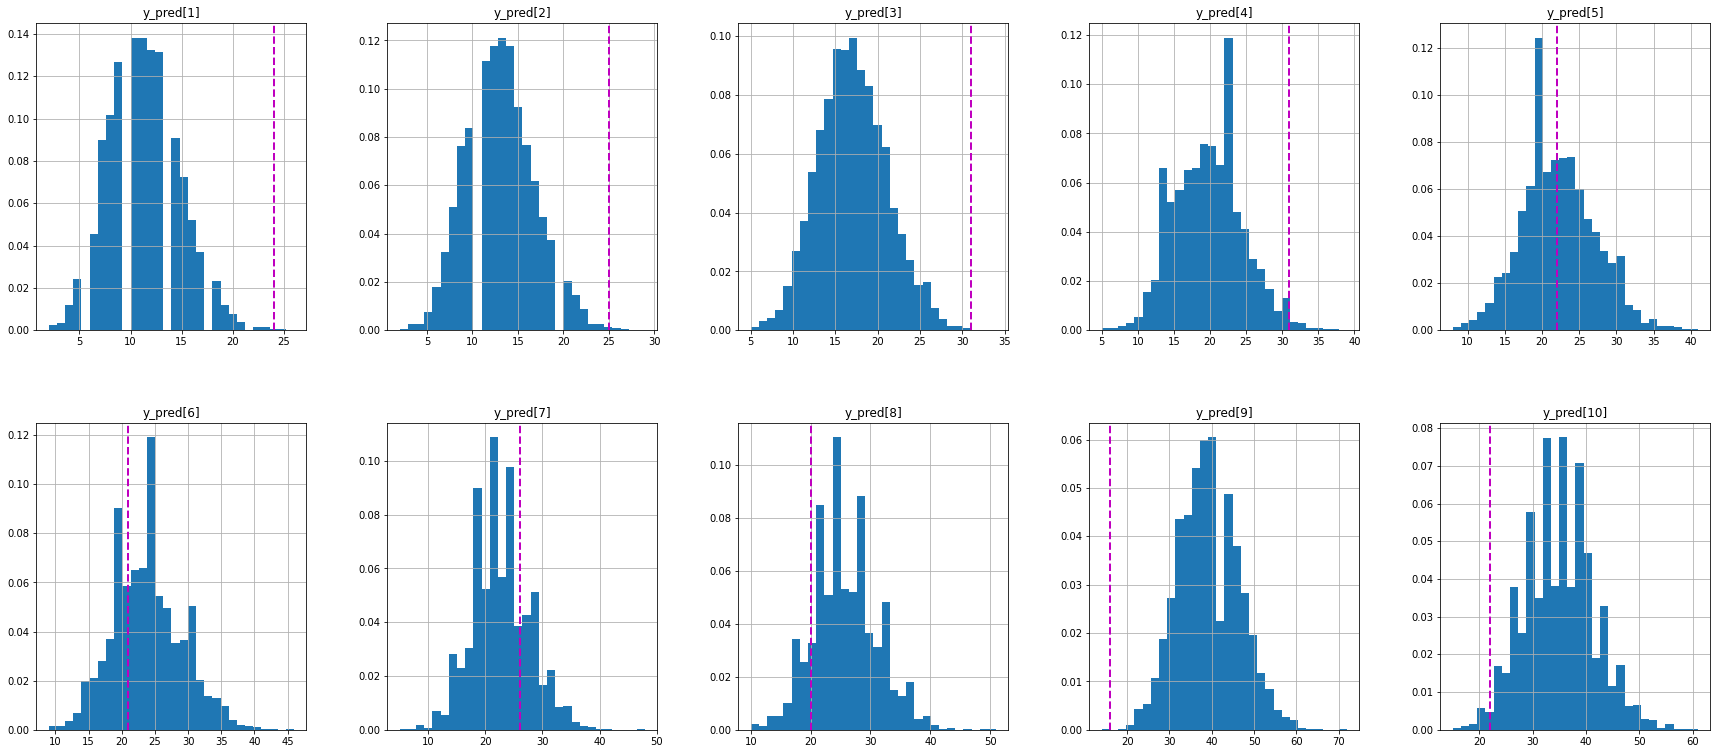

In [55]:
df_hist2 = df_fit.loc[:, "y_pred[1]":]
ax = df_hist2.hist(layout=(2, 5), density=True, bins=30, figsize=(30, 13))
ax = ax.reshape((10))
for i in range(ax.shape[0]):
    ax[i].axvline(data['Fatal accidents'].iloc[i], linestyle='dashed', linewidth=2, color = 'm')
plt.show()

Improving the posterior predictive analysis

In [56]:
model_fit=CmdStanModel(stan_file='model3.stan')
N=data.shape[0]
data_imp_fit = {'N': N, 'n': data["Miles flown [100 mln miles]"].values, 'y': data["Fatal accidents"].values}

fit=model_fit.sample(data=data_imp_fit,seed=28052020)
df_imp_fit = fit.draws_pd()
df_imp_fit.head()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |███████▋  | 00:02 Iteration:


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,480.033,0.988591,0.003414,10.0,1023.0,0.0,-472.289,1.252310,0.962035,1.08360,...,15.0,13.0,22.0,30.0,26.0,22.0,30.0,39.0,35.0,35.0
1,478.280,0.850469,0.003414,10.0,1023.0,0.0,-472.081,1.136860,0.790796,1.26920,...,11.0,14.0,25.0,23.0,29.0,14.0,46.0,20.0,29.0,27.0
2,483.130,0.989522,0.003414,10.0,1023.0,0.0,-475.426,0.928304,1.152520,1.15161,...,17.0,17.0,27.0,23.0,23.0,20.0,12.0,20.0,28.0,26.0
3,482.542,0.932060,0.003414,10.0,1023.0,0.0,-480.913,1.311260,0.974751,1.00537,...,11.0,13.0,21.0,26.0,33.0,24.0,21.0,21.0,30.0,29.0
4,480.712,0.989440,0.003414,10.0,1023.0,0.0,-477.794,1.394820,1.257200,1.07433,...,24.0,23.0,20.0,28.0,16.0,28.0,27.0,18.0,18.0,37.0


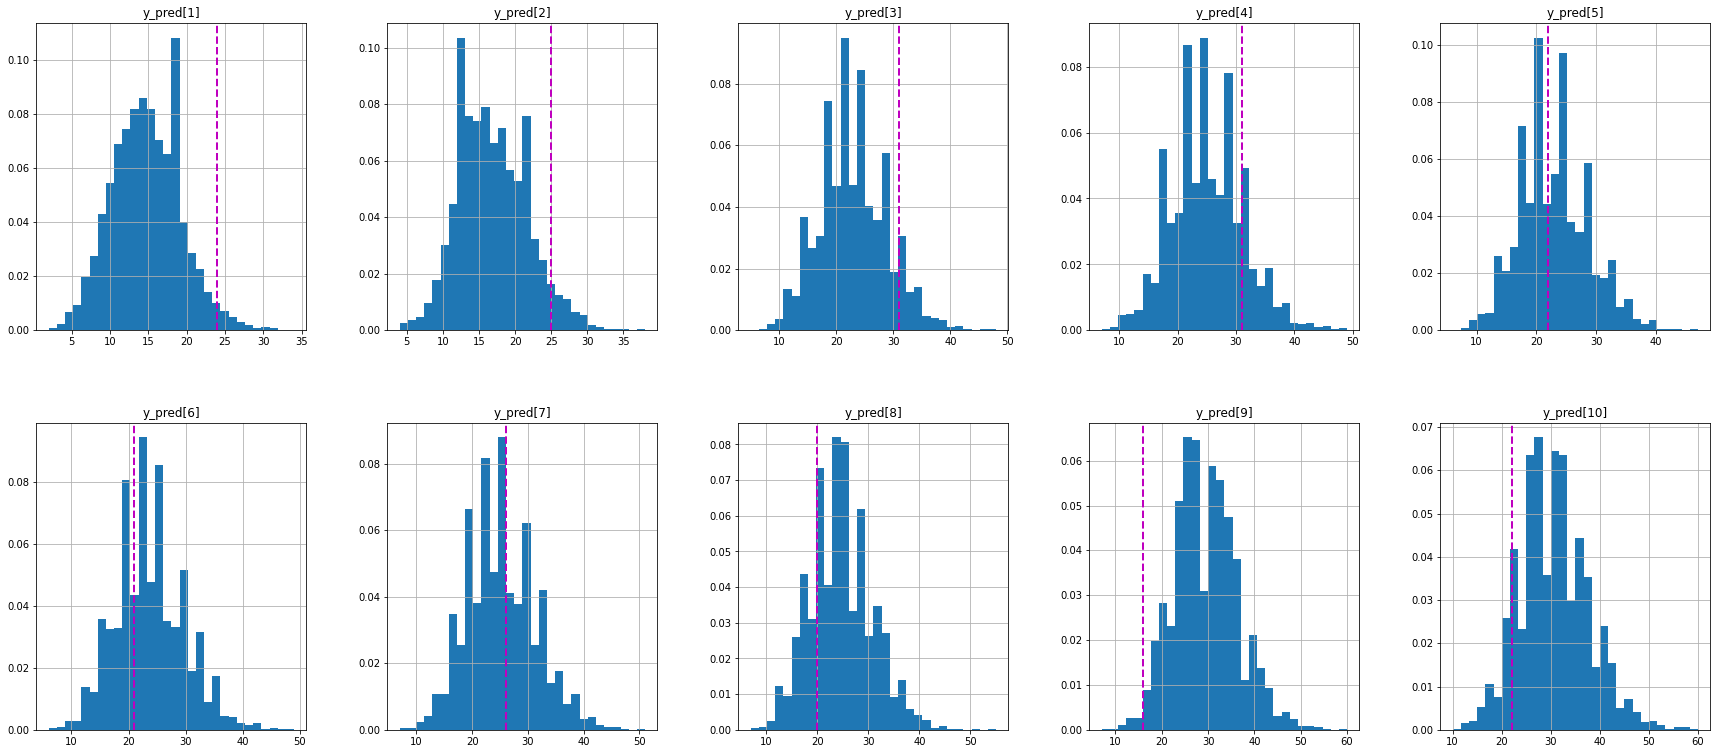

In [57]:
df_hist3 = df_imp_fit.loc[:, "y_pred[1]":]
ax = df_hist3.hist(layout=(2, 5), density=True, bins=30, figsize=(30, 13))
ax = ax.reshape((10))
for i in range(ax.shape[0]):
    ax[i].axvline(data['Fatal accidents'].iloc[i], linestyle='dashed', linewidth=2, color = 'm')
plt.show()